# Import Libraries


In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
import pickle


# Load Data


In [22]:
# Load the dataset
os.chdir(r'C:\Users\NIKILA MUTHAPPA\Desktop\Bank_Loan_Prediction')
train = pd.read_csv('./Loan_Data/train.csv')
train.Loan_Status = train.Loan_Status.map({'Y': 1, 'N': 0})


# Preprocess Data


In [23]:
# Preprocessing on the data
Loan_status = train.Loan_Status
train.drop('Loan_Status', axis=1, inplace=True)
test = pd.read_csv('./Loan_Data/test.csv')
Loan_ID = test.Loan_ID
data = train.append(test, ignore_index=True)


C:\Users\NIKILA MUTHAPPA\AppData\Local\Temp\ipykernel_23668\2080277764.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test, ignore_index=True)


#  Label Encoding


In [24]:
# Label encoding
data.Gender = data.Gender.map({'Male': 1, 'Female': 0})
data.Married = data.Married.map({'Yes': 1, 'No': 0})
data.Dependents = data.Dependents.map({'0': 0, '1': 1, '2': 2, '3+': 3})
data.Education = data.Education.map({'Graduate': 1, 'Not Graduate': 0})
data.Self_Employed = data.Self_Employed.map({'Yes': 1, 'No': 0})
data.Property_Area = data.Property_Area.map({'Urban': 2, 'Rural': 0, 'Semiurban': 1})


#  Fill Missing Values


In [25]:
# Filling missing values
data.Credit_History.fillna(np.random.randint(0, 2), inplace=True)
data.Married.fillna(np.random.randint(0, 2), inplace=True)
data.LoanAmount.fillna(data.LoanAmount.median(), inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(), inplace=True)
data.Gender.fillna(np.random.randint(0, 2), inplace=True)
data.Dependents.fillna(data.Dependents.median(), inplace=True)
data.Self_Employed.fillna(np.random.randint(0, 2), inplace=True)


# Drop Columns

In [26]:
# Dropping Loan ID from data
data.drop('Loan_ID', inplace=True, axis=1)

# Add Loan_Status back to the train portion for plotting
train['Loan_Status'] = Loan_status


# Exploratory Data Analysis (EDA) - Loan Status Distribution

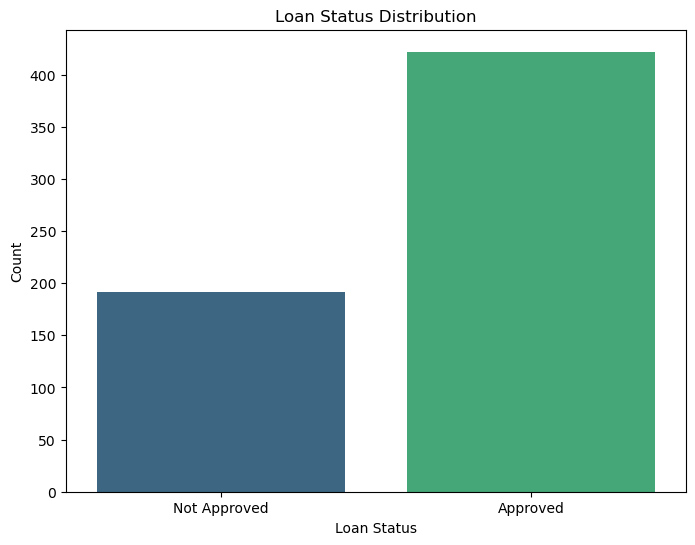

In [27]:
# EDA on train DataFrame (before combining)
plt.figure(figsize=(8, 6))
loan_status_counts = train['Loan_Status'].value_counts()
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='viridis')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Approved', 'Approved'])
plt.show()


# Gender Distribution

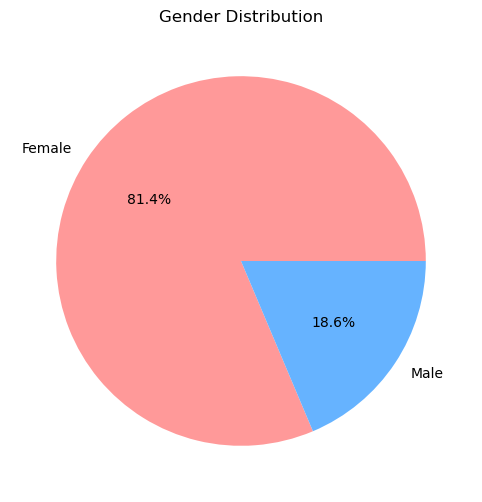

In [28]:
# Other EDA visualizations
plt.figure(figsize=(8, 6))
gender_counts = train['Gender'].value_counts()
plt.pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Gender Distribution')
plt.show()

# Correlation Matrix

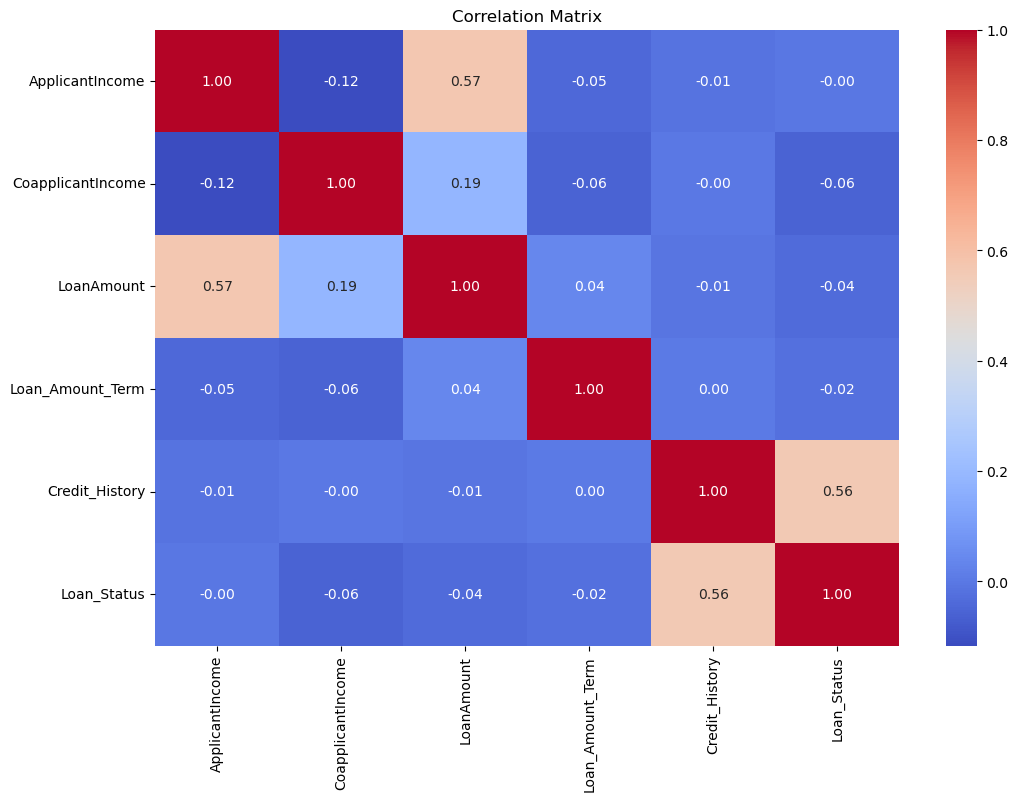

In [29]:
plt.figure(figsize=(12, 8))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Numerical Features

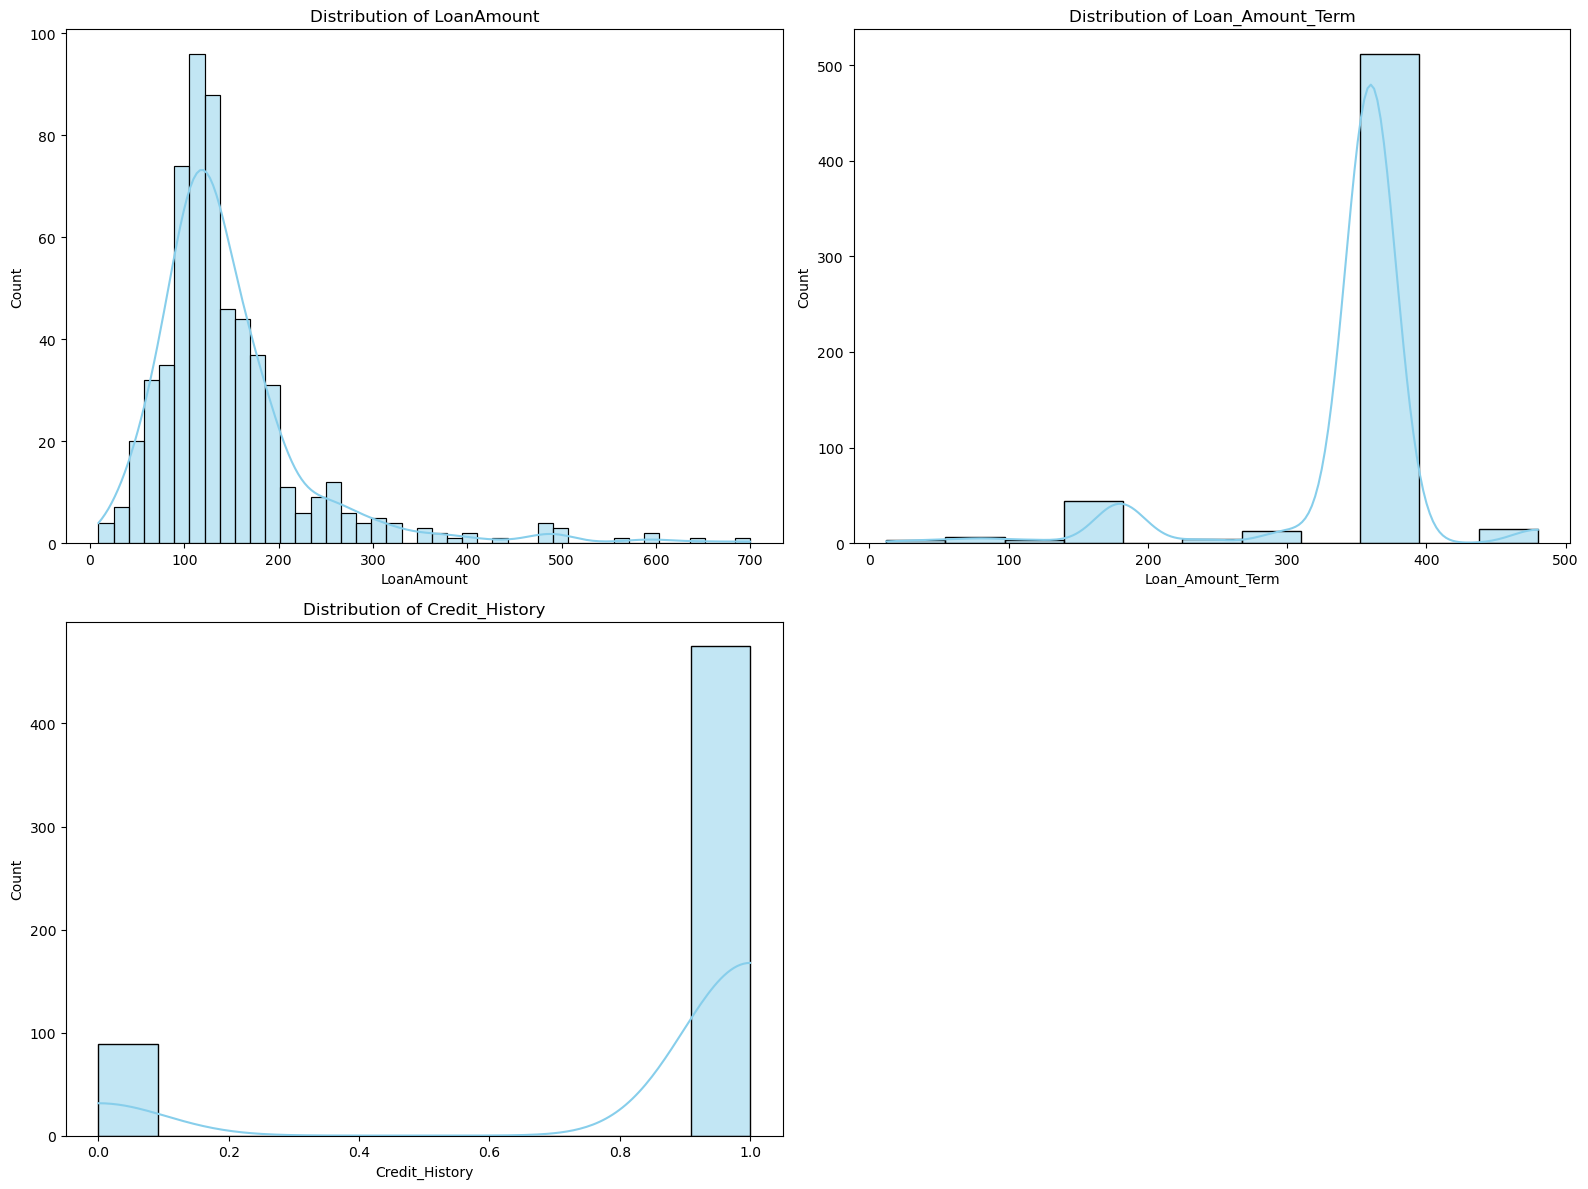

In [30]:
plt.figure(figsize=(16, 12))
num_features = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#  Loan Amount by Loan Status

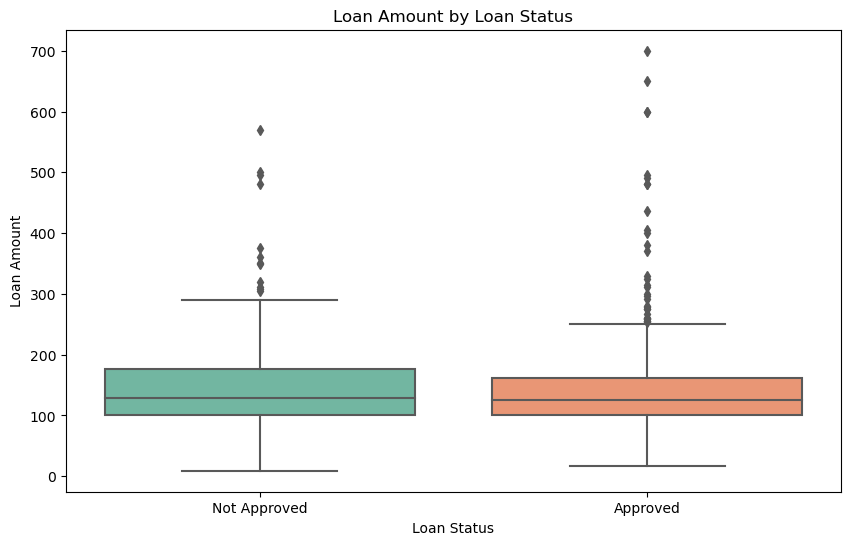

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train, palette='Set2')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(ticks=[0, 1], labels=['Not Approved', 'Approved'])
plt.show()

# Pair Plot of Numerical Features

<Figure size 1200x800 with 0 Axes>

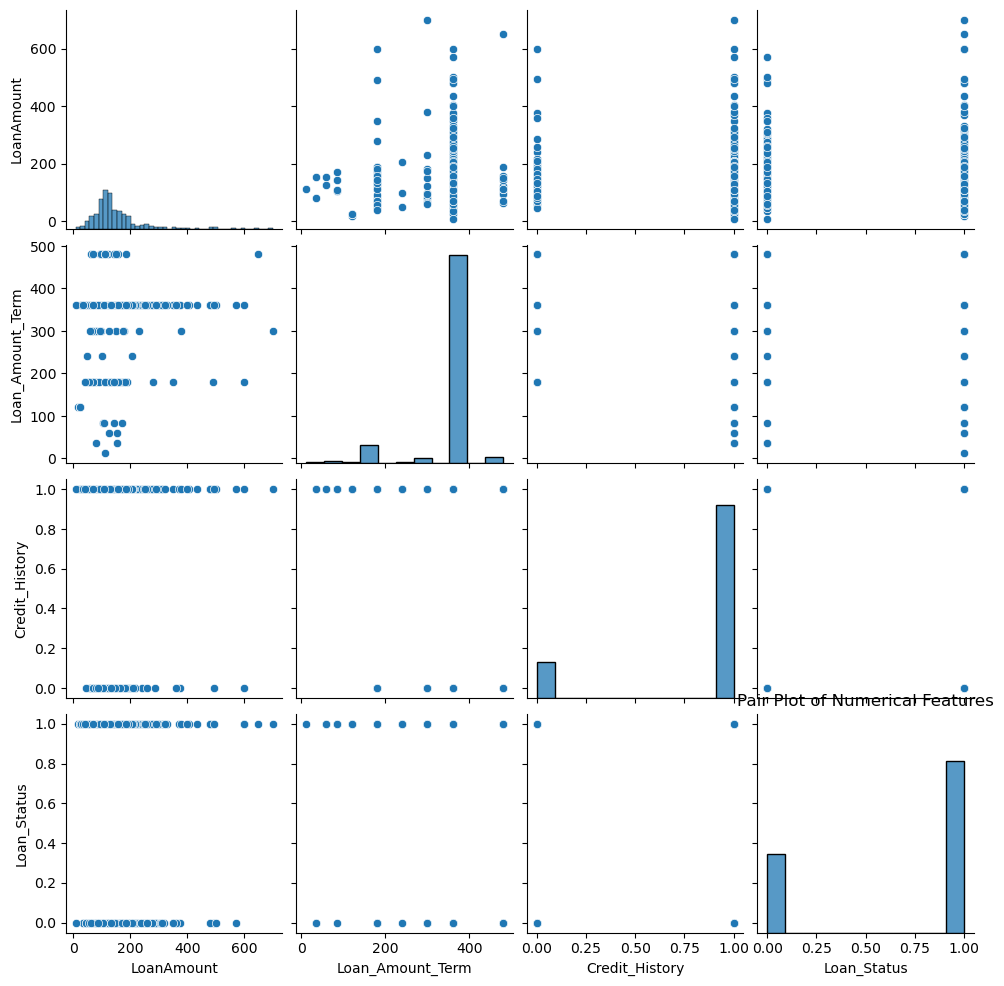

In [32]:
plt.figure(figsize=(12, 8))
sns.pairplot(train[['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']])
plt.title('Pair Plot of Numerical Features')
plt.show()

# Count of Categorical Features

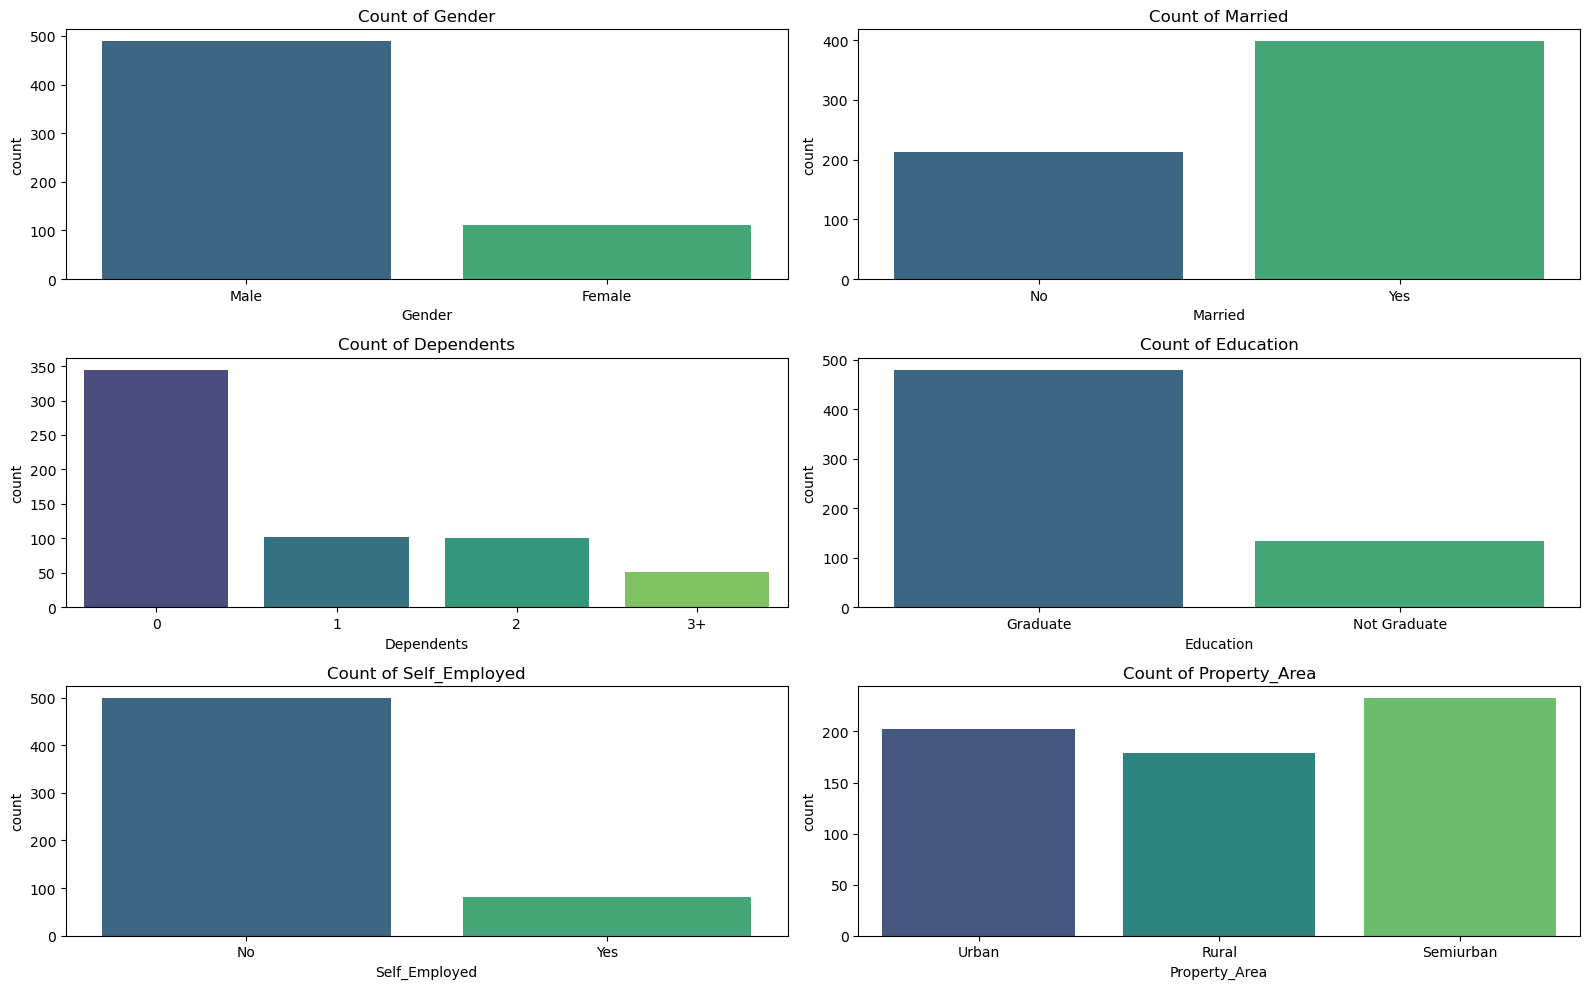

In [33]:
plt.figure(figsize=(16, 10))
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, data=train, palette='viridis')
    plt.title(f'Count of {feature}')
plt.tight_layout()
plt.show()


# Violin Plot of Loan Amount by Loan Status

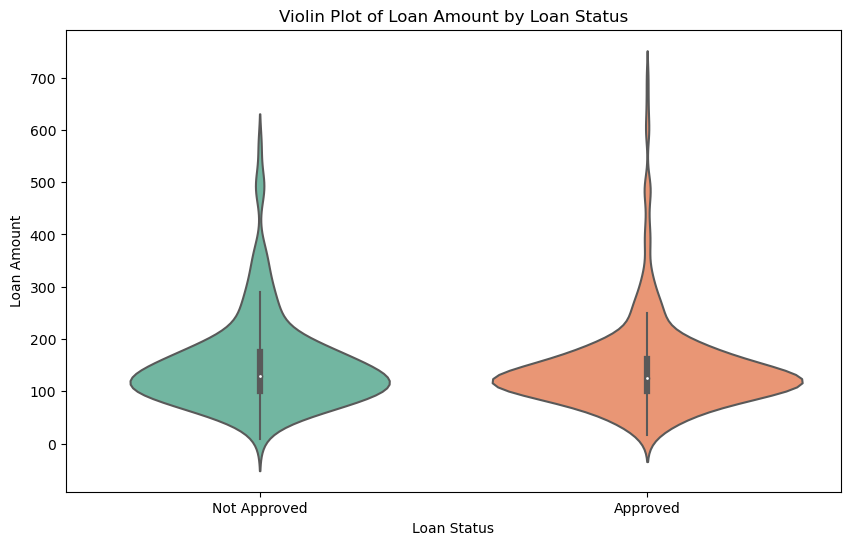

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Loan_Status', y='LoanAmount', data=train, palette='Set2')
plt.title('Violin Plot of Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(ticks=[0, 1], labels=['Not Approved', 'Approved'])
plt.show()

# Heatmap of Missing Values

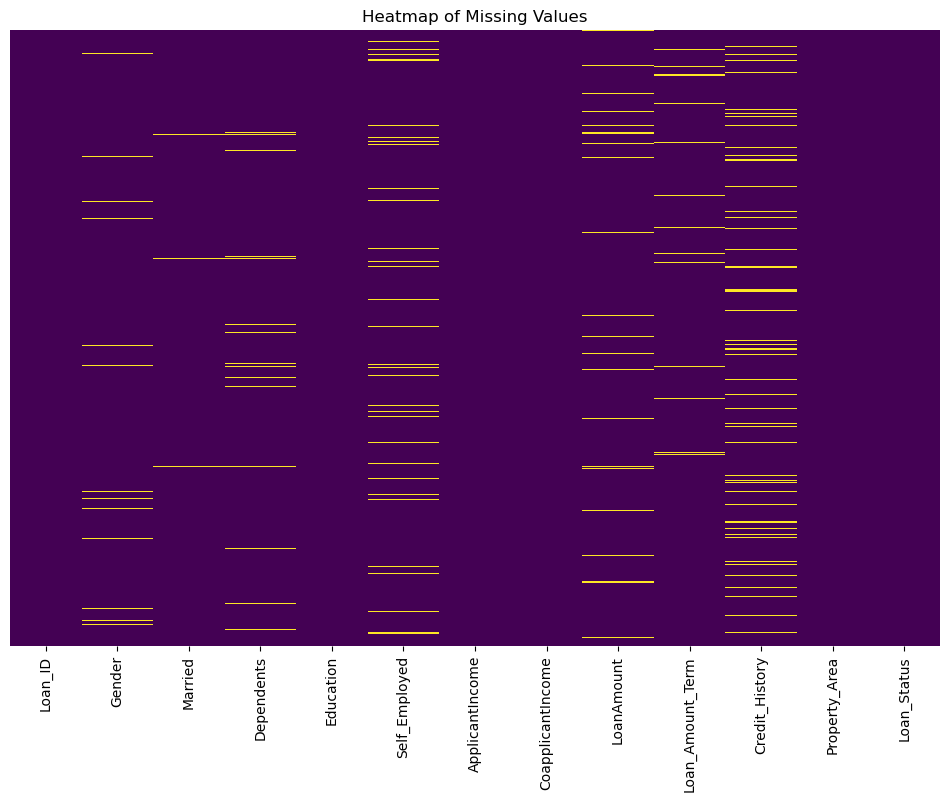

In [35]:
plt.figure(figsize=(12, 8))
missing_data = train.isnull()
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

# Split Data into Features and Target

In [36]:
# Split the Data into X & Y
train_X = data.iloc[:614,]
train_y = Loan_status  

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, random_state=0)


# Feature Importance Plot from RandomForest

Feature importances:
ApplicantIncome: 0.23466190762046524
LoanAmount: 0.21034813520741868
Credit_History: 0.1593041245471308
CoapplicantIncome: 0.13580442709549387
Property_Area: 0.05620184481026846
Dependents: 0.05572706481881132
Loan_Amount_Term: 0.047022292442540504
Education: 0.028165671338081014
Married: 0.025594863211037933
Gender: 0.024466714325103854
Self_Employed: 0.022702954583648217


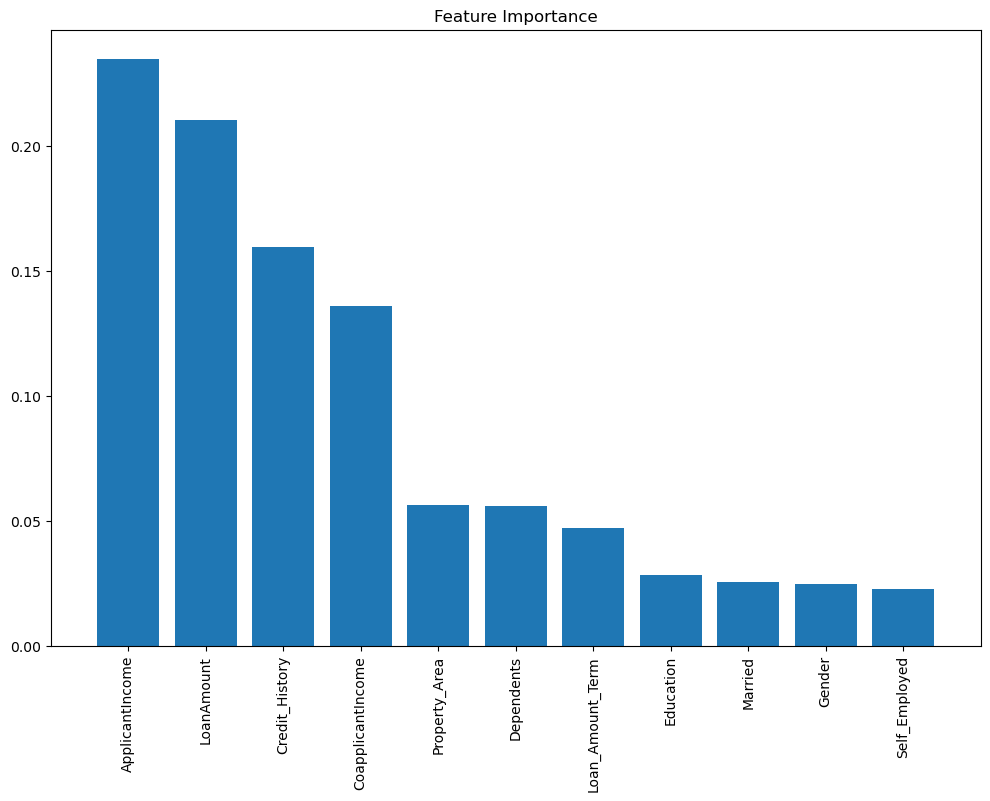

In [37]:
# Feature Importance Plot from RandomForest
model = RandomForestClassifier()
model.fit(train_X, train_y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature importances
print("Feature importances:")
for i in range(train_X.shape[1]):
    print(f"{train_X.columns[indices[i]]}: {importances[indices[i]]}")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(train_X.shape[1]), importances[indices], align='center')
plt.xticks(range(train_X.shape[1]), train_X.columns[indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.show()

# Evaluate Different Machine Learning Models

In [38]:
# Using Different types of Machine Learning Models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Classifier", SVC(probability=True)),
    ("K-Nearest Neighbour", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB())
]

scoring = 'accuracy'

result = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    cv_result = cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print(model)
    print("%s %f" % (name, cv_result.mean()))


C:\Users\NIKILA MUTHAPPA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\NIKILA MUTHAPPA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

LogisticRegression()
Logistic Regression 0.754348
DecisionTreeClassifier()
Decision Tree 0.641304
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.760870
RandomForestClassifier()
Random Forest 0.728261
SVC(probability=True)
Support Vector Classifier 0.671739
KNeighborsClassifier()
K-Nearest Neighbour 0.643478


C:\Users\NIKILA MUTHAPPA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\NIKILA MUTHAPPA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

GaussianNB()
Naive Bayes 0.736957


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Train and Save Logistic Regression Model

In [41]:
# Train the Logistic Regression model
LR = LogisticRegression()
LR.fit(train_X, train_y)

# Define the directory path
directory_path = r'C:\Users\NIKILA MUTHAPPA\Desktop\Bank_Loan_Prediction'

# Create the directory if it does not exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Save the model
file = os.path.join(directory_path, 'ML_Model.pkl')
with open(file, 'wb') as f:
    pickle.dump(LR, f)


# Evaluate Logistic Regression Model

In [42]:
# Evaluate the Logistic Regression model
pred = LR.predict(test_X)
print("Model Accuracy:- ", accuracy_score(test_y, pred))
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))


Model Accuracy:-  0.8116883116883117
[[ 23  20]
 [  9 102]]
              precision    recall  f1-score   support

           0       0.72      0.53      0.61        43
           1       0.84      0.92      0.88       111

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.74       154
weighted avg       0.80      0.81      0.80       154



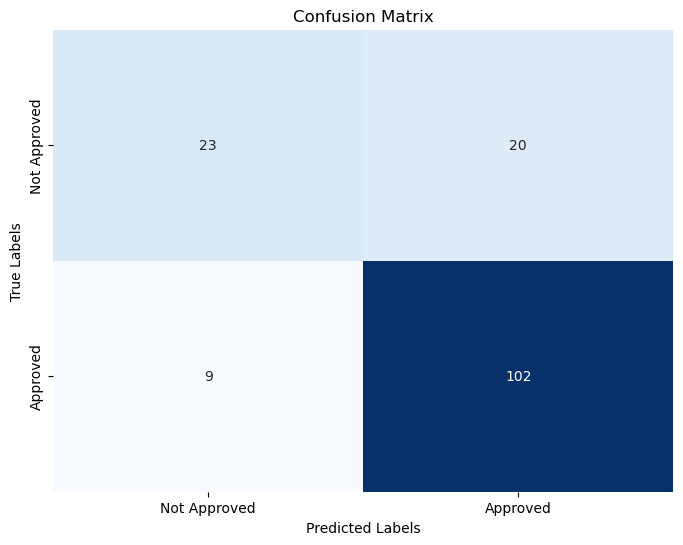

In [43]:
# Confusion Matrix
cm = confusion_matrix(test_y, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Approved', 'Approved'], 
            yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Classification Report Heatmap

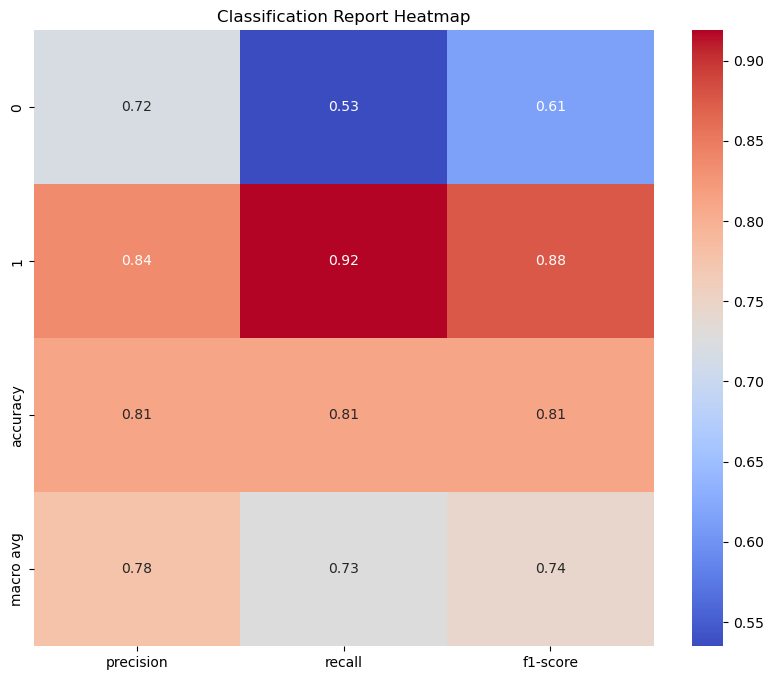

In [44]:
# Classification Report
report = classification_report(test_y, pred, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.show()


# ROC Curve

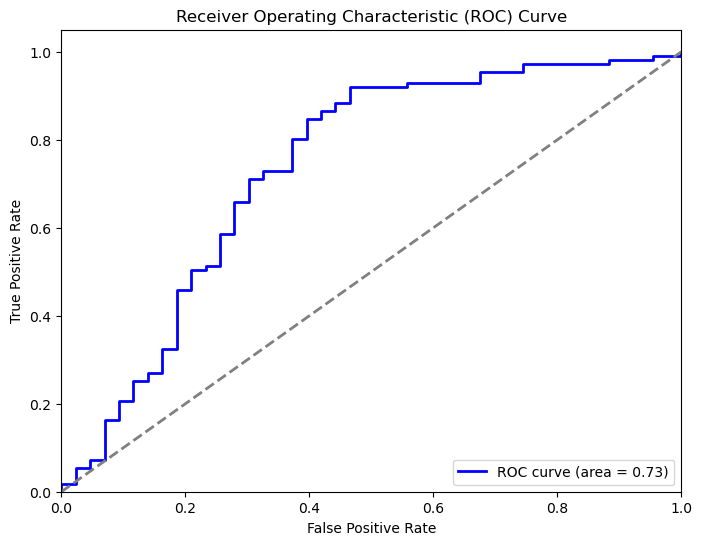

In [45]:
# ROC Curve
fpr, tpr, _ = roc_curve(test_y, LR.predict_proba(test_X)[:,1])
roc_auc = roc_auc_score(test_y, LR.predict_proba(test_X)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Evaluate Decision Tree Classifier

In [50]:
# Instantiate and train the Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)

DecisionTreeClassifier()

In [51]:
# Evaluate the Decision Tree model
pred_dt = dt.predict(test_X)
print("Decision Tree Model Accuracy: ", accuracy_score(test_y, pred_dt))
print(confusion_matrix(test_y, pred_dt))
print(classification_report(test_y, pred_dt))

Decision Tree Model Accuracy:  0.7012987012987013
[[22 21]
 [25 86]]
              precision    recall  f1-score   support

           0       0.47      0.51      0.49        43
           1       0.80      0.77      0.79       111

    accuracy                           0.70       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.71      0.70      0.71       154



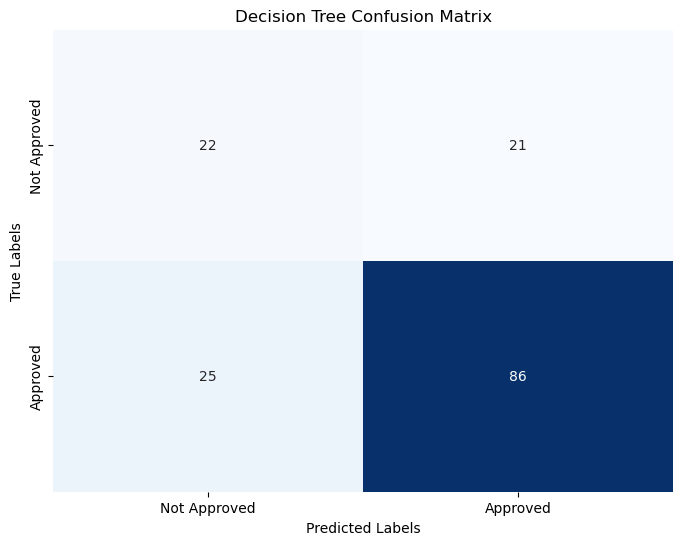

In [52]:
# Confusion Matrix
cm_dt = confusion_matrix(test_y, pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Approved', 'Approved'], 
            yticklabels=['Not Approved', 'Approved'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report Heatmap

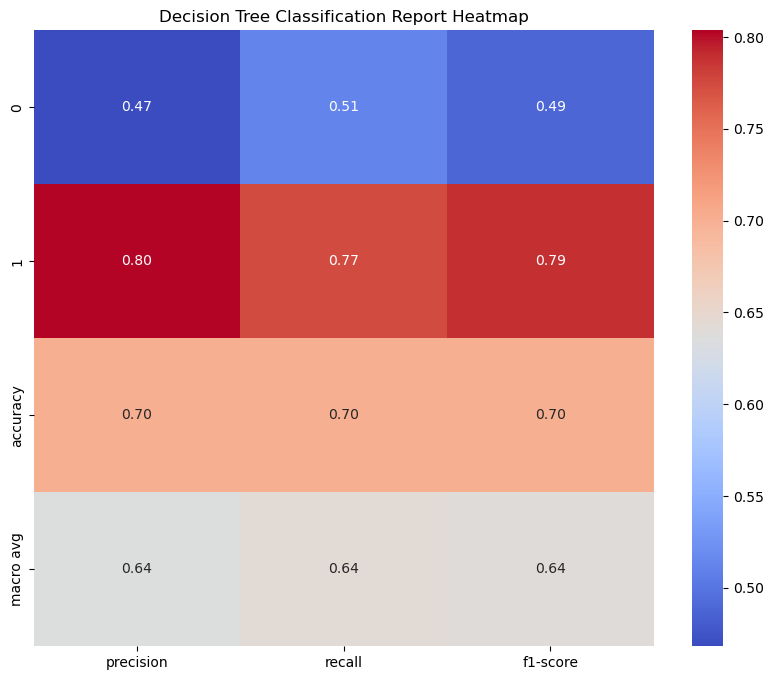

In [53]:
# Classification Report
report_dt = classification_report(test_y, pred_dt, output_dict=True)
report_dt_df = pd.DataFrame(report_dt).transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(report_dt_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Decision Tree Classification Report Heatmap')
plt.show()

# ROC Curve

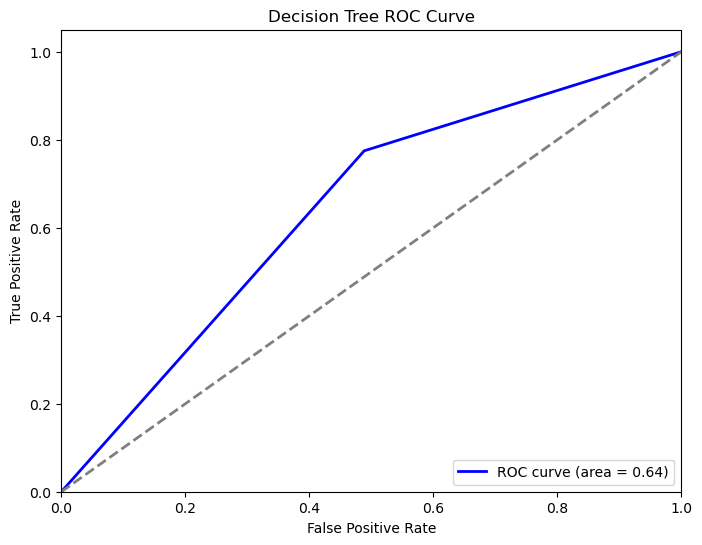

In [54]:
# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(test_y, dt.predict_proba(test_X)[:,1])
roc_auc_dt = roc_auc_score(test_y, dt.predict_proba(test_X)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the Linear Discriminant Analysis

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate and train the Linear Discriminant Analysis model
lda = LinearDiscriminantAnalysis()
lda.fit(train_X, train_y)

LinearDiscriminantAnalysis()

In [56]:
# Evaluate the Linear Discriminant Analysis model
pred_lda = lda.predict(test_X)
print("Linear Discriminant Analysis Model Accuracy: ", accuracy_score(test_y, pred_lda))
print(confusion_matrix(test_y, pred_lda))
print(classification_report(test_y, pred_lda))

Linear Discriminant Analysis Model Accuracy:  0.7922077922077922
[[ 22  21]
 [ 11 100]]
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        43
           1       0.83      0.90      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154



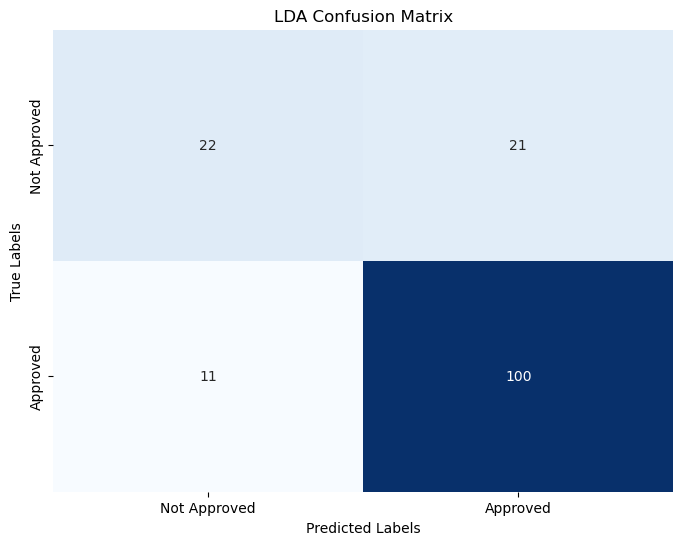

In [57]:
# Confusion Matrix
cm_lda = confusion_matrix(test_y, pred_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Approved', 'Approved'], 
            yticklabels=['Not Approved', 'Approved'])
plt.title('LDA Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report Heatmap

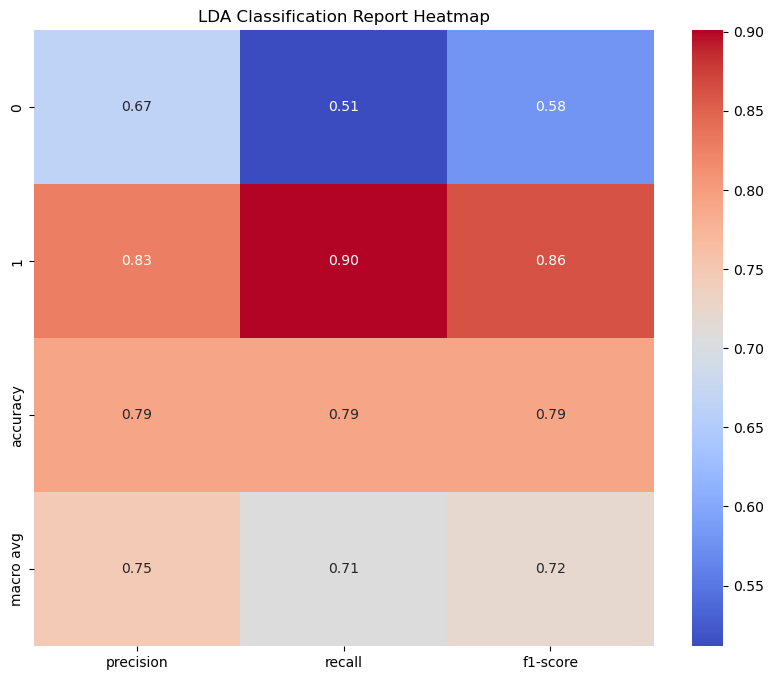

In [58]:
# Classification Report
report_lda = classification_report(test_y, pred_lda, output_dict=True)
report_lda_df = pd.DataFrame(report_lda).transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(report_lda_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('LDA Classification Report Heatmap')
plt.show()

# ROC Curve

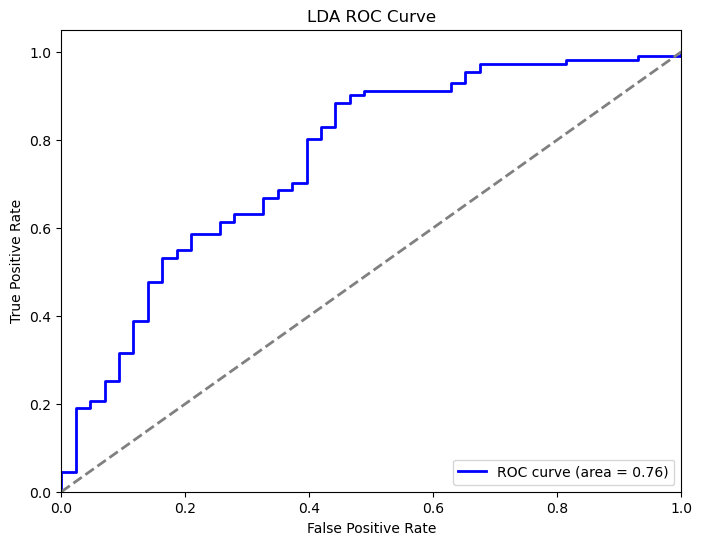

In [59]:
# ROC Curve
fpr_lda, tpr_lda, _ = roc_curve(test_y, lda.predict_proba(test_X)[:,1])
roc_auc_lda = roc_auc_score(test_y, lda.predict_proba(test_X)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lda)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the Random Forest model
rf = RandomForestClassifier()
rf.fit(train_X, train_y)

RandomForestClassifier()

In [61]:
# Evaluate the Random Forest model
pred_rf = rf.predict(test_X)
print("Random Forest Model Accuracy: ", accuracy_score(test_y, pred_rf))
print(confusion_matrix(test_y, pred_rf))
print(classification_report(test_y, pred_rf))


Random Forest Model Accuracy:  0.7857142857142857
[[23 20]
 [13 98]]
              precision    recall  f1-score   support

           0       0.64      0.53      0.58        43
           1       0.83      0.88      0.86       111

    accuracy                           0.79       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154



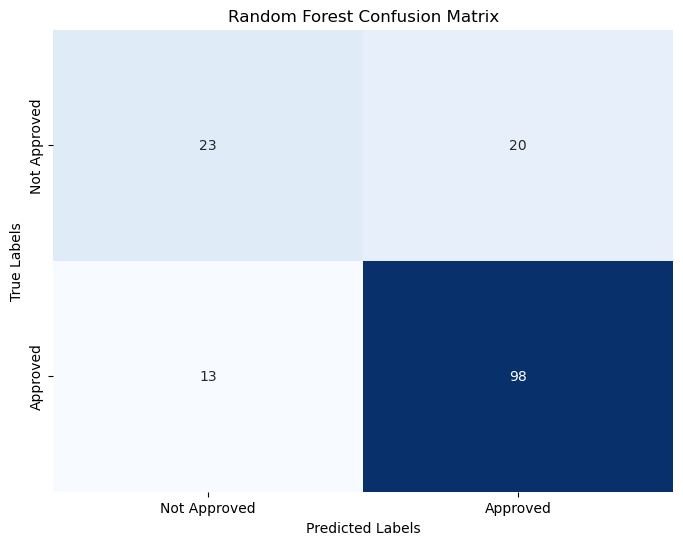

In [62]:
# Confusion Matrix
cm_rf = confusion_matrix(test_y, pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Approved', 'Approved'], 
            yticklabels=['Not Approved', 'Approved'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report

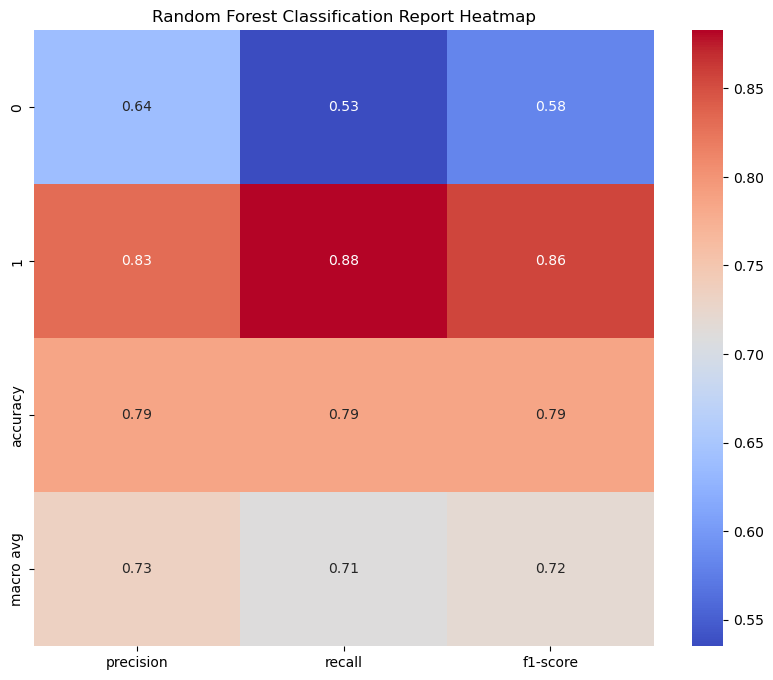

In [63]:
# Classification Report
report_rf = classification_report(test_y, pred_rf, output_dict=True)
report_rf_df = pd.DataFrame(report_rf).transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(report_rf_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Random Forest Classification Report Heatmap')
plt.show()

# ROC Curve

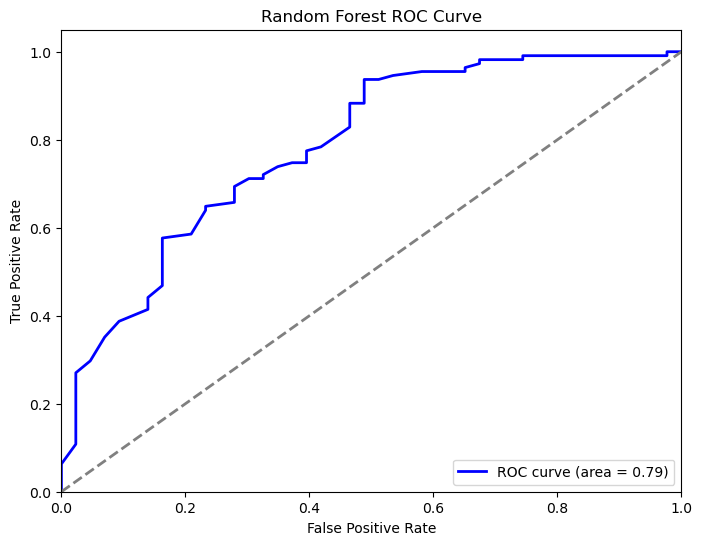

In [64]:
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(test_y, rf.predict_proba(test_X)[:,1])
roc_auc_rf = roc_auc_score(test_y, rf.predict_proba(test_X)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the Support Vector Classifier

In [65]:
from sklearn.svm import SVC

# Instantiate and train the Support Vector Classifier model
svc = SVC(probability=True)
svc.fit(train_X, train_y)

SVC(probability=True)

In [66]:
# Evaluate the Support Vector Classifier model
pred_svc = svc.predict(test_X)
print("Support Vector Classifier Model Accuracy: ", accuracy_score(test_y, pred_svc))
print(confusion_matrix(test_y, pred_svc))
print(classification_report(test_y, pred_svc))

Support Vector Classifier Model Accuracy:  0.7207792207792207
[[  0  43]
 [  0 111]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.72      1.00      0.84       111

    accuracy                           0.72       154
   macro avg       0.36      0.50      0.42       154
weighted avg       0.52      0.72      0.60       154



C:\Users\NIKILA MUTHAPPA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NIKILA MUTHAPPA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NIKILA MUTHAPPA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


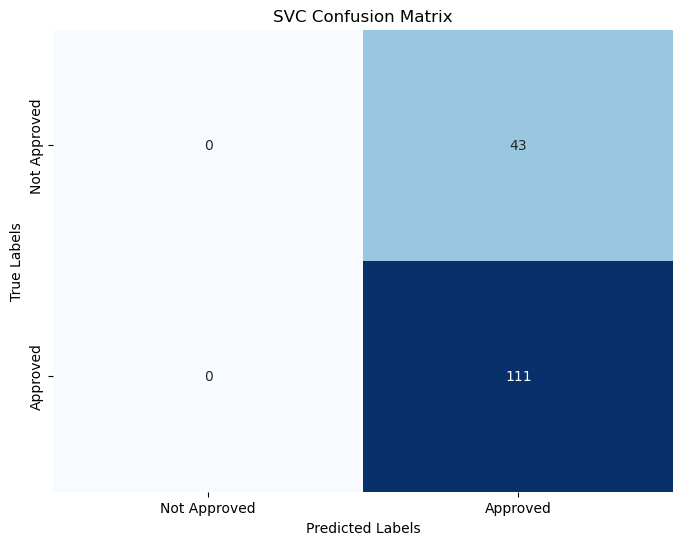

In [67]:
# Confusion Matrix
cm_svc = confusion_matrix(test_y, pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Approved', 'Approved'], 
            yticklabels=['Not Approved', 'Approved'])
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report


C:\Users\NIKILA MUTHAPPA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NIKILA MUTHAPPA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NIKILA MUTHAPPA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


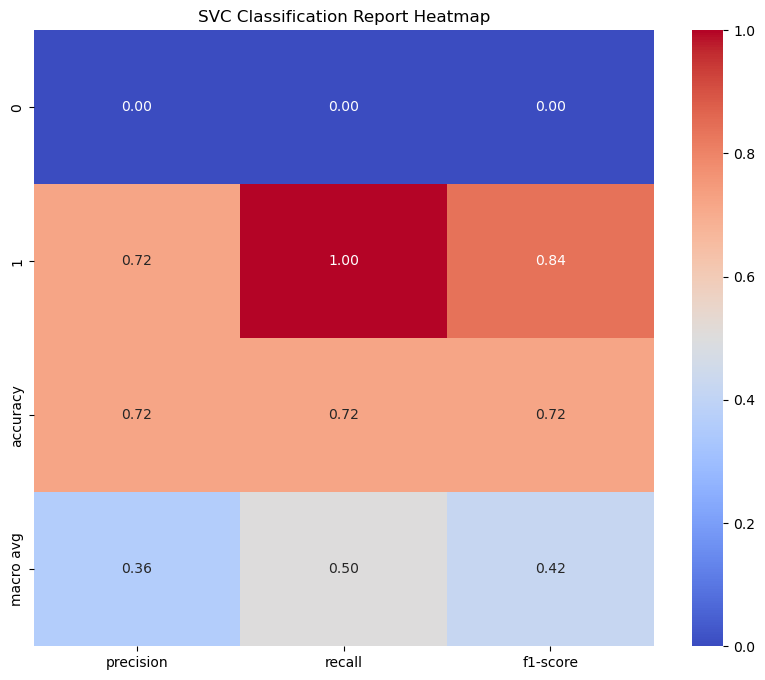

In [68]:
# Classification Report
report_svc = classification_report(test_y, pred_svc, output_dict=True)
report_svc_df = pd.DataFrame(report_svc).transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(report_svc_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('SVC Classification Report Heatmap')
plt.show()

# ROC Curve

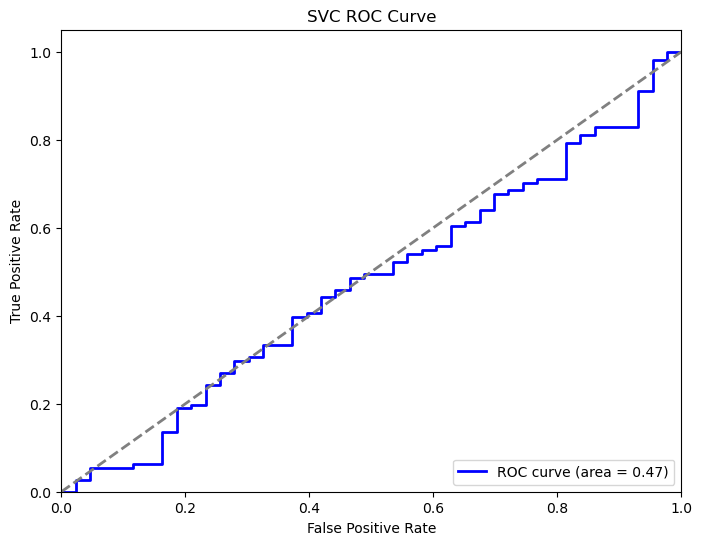

In [70]:
# ROC Curve
fpr_svc, tpr_svc, _ = roc_curve(test_y, svc.decision_function(test_X))
roc_auc_svc = roc_auc_score(test_y, svc.decision_function(test_X))

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the K-Nearest Neighbors

In [71]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)

KNeighborsClassifier()

In [72]:
# Evaluate the K-Nearest Neighbors model
pred_knn = knn.predict(test_X)
print("K-Nearest Neighbors Model Accuracy: ", accuracy_score(test_y, pred_knn))
print(confusion_matrix(test_y, pred_knn))
print(classification_report(test_y, pred_knn))

K-Nearest Neighbors Model Accuracy:  0.6168831168831169
[[10 33]
 [26 85]]
              precision    recall  f1-score   support

           0       0.28      0.23      0.25        43
           1       0.72      0.77      0.74       111

    accuracy                           0.62       154
   macro avg       0.50      0.50      0.50       154
weighted avg       0.60      0.62      0.61       154



C:\Users\NIKILA MUTHAPPA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


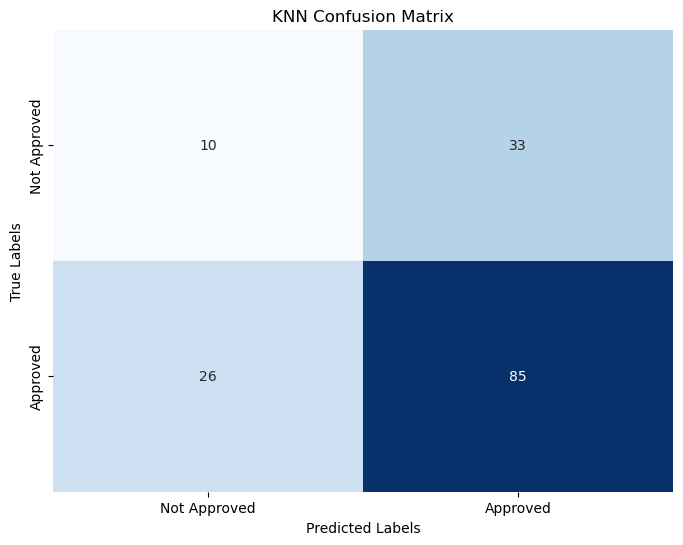

In [73]:
# Confusion Matrix
cm_knn = confusion_matrix(test_y, pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Approved', 'Approved'], 
            yticklabels=['Not Approved', 'Approved'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Classification Report

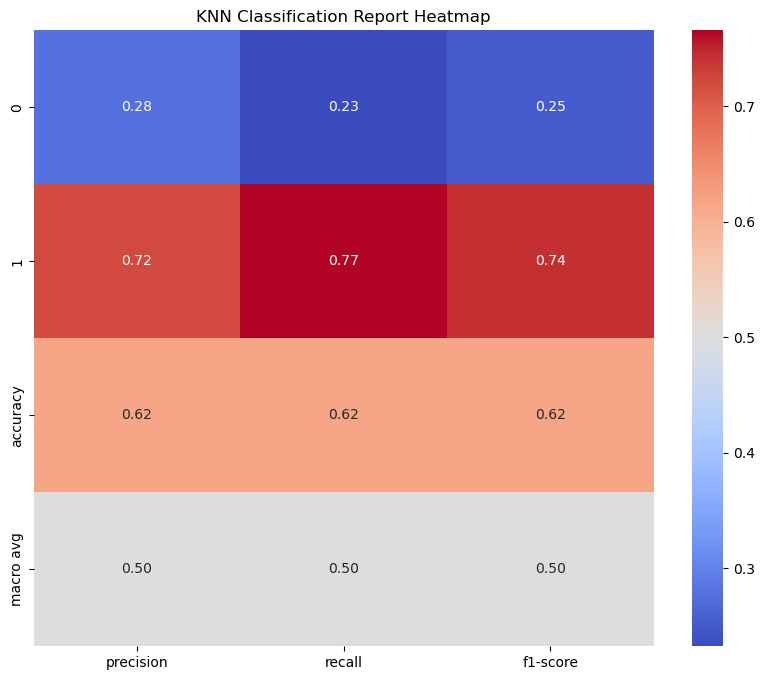

In [74]:
# Classification Report
report_knn = classification_report(test_y, pred_knn, output_dict=True)
report_knn_df = pd.DataFrame(report_knn).transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(report_knn_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('KNN Classification Report Heatmap')
plt.show()

# ROC Curve

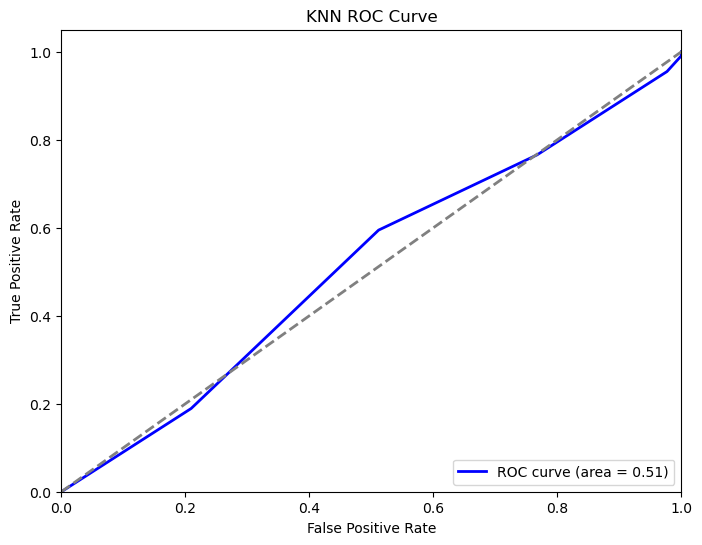

In [75]:
# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(test_y, knn.predict_proba(test_X)[:,1])
roc_auc_knn = roc_auc_score(test_y, knn.predict_proba(test_X)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB

# Instantiate and train the Naive Bayes model
nb = GaussianNB()
nb.fit(train_X, train_y)

GaussianNB()

In [77]:
# Evaluate the Naive Bayes model
pred_nb = nb.predict(test_X)
print("Naive Bayes Model Accuracy: ", accuracy_score(test_y, pred_nb))
print(confusion_matrix(test_y, pred_nb))
print(classification_report(test_y, pred_nb))

Naive Bayes Model Accuracy:  0.7792207792207793
[[22 21]
 [13 98]]
              precision    recall  f1-score   support

           0       0.63      0.51      0.56        43
           1       0.82      0.88      0.85       111

    accuracy                           0.78       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.77      0.78      0.77       154



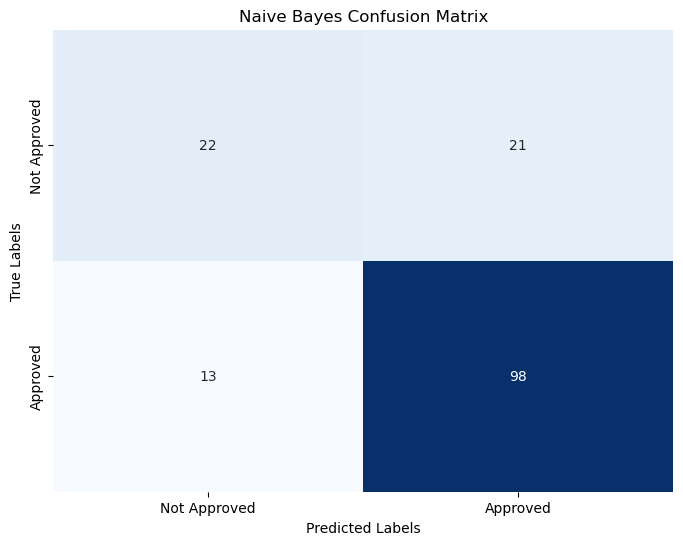

In [78]:
# Confusion Matrix
cm_nb = confusion_matrix(test_y, pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Approved', 'Approved'], 
            yticklabels=['Not Approved', 'Approved'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report

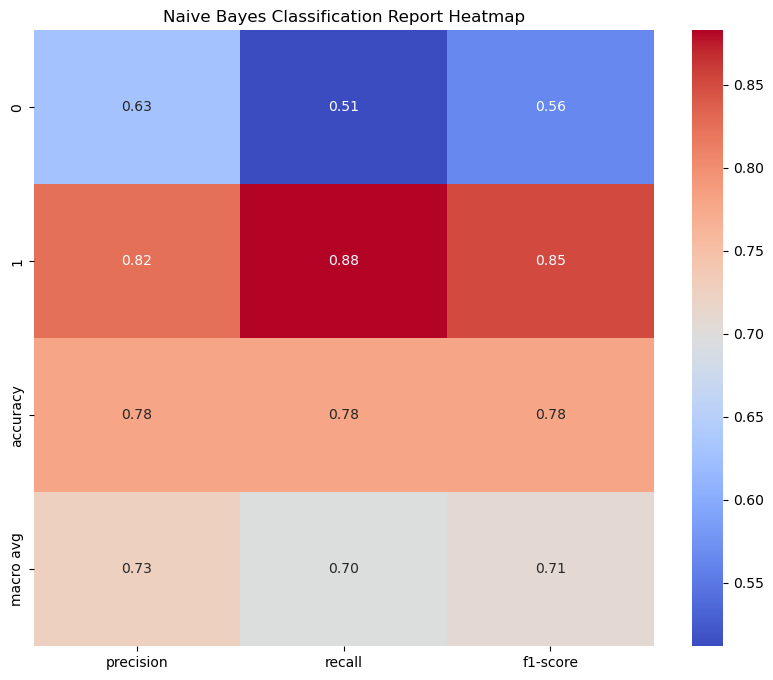

In [79]:
# Classification Report
report_nb = classification_report(test_y, pred_nb, output_dict=True)
report_nb_df = pd.DataFrame(report_nb).transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(report_nb_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Naive Bayes Classification Report Heatmap')
plt.show()

# ROC Curve

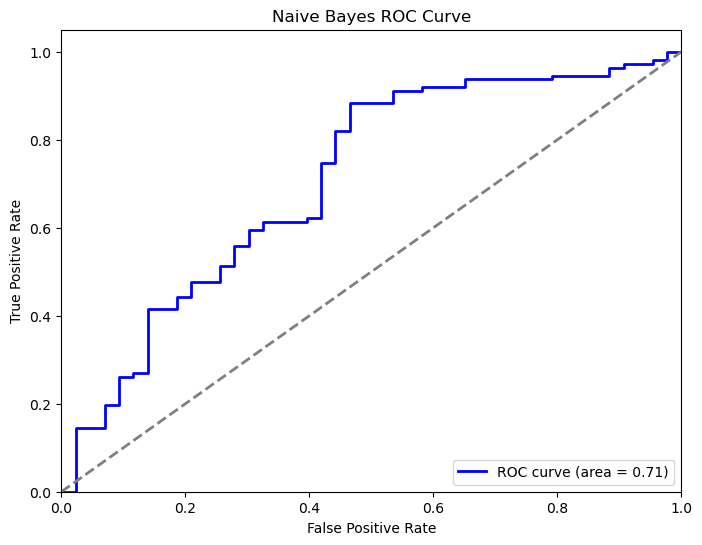

In [80]:
fpr_nb, tpr_nb, _ = roc_curve(test_y, nb.predict_proba(test_X)[:,1])
roc_auc_nb = roc_auc_score(test_y, nb.predict_proba(test_X)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc='lower right')
plt.show()

C:\Users\NIKILA MUTHAPPA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


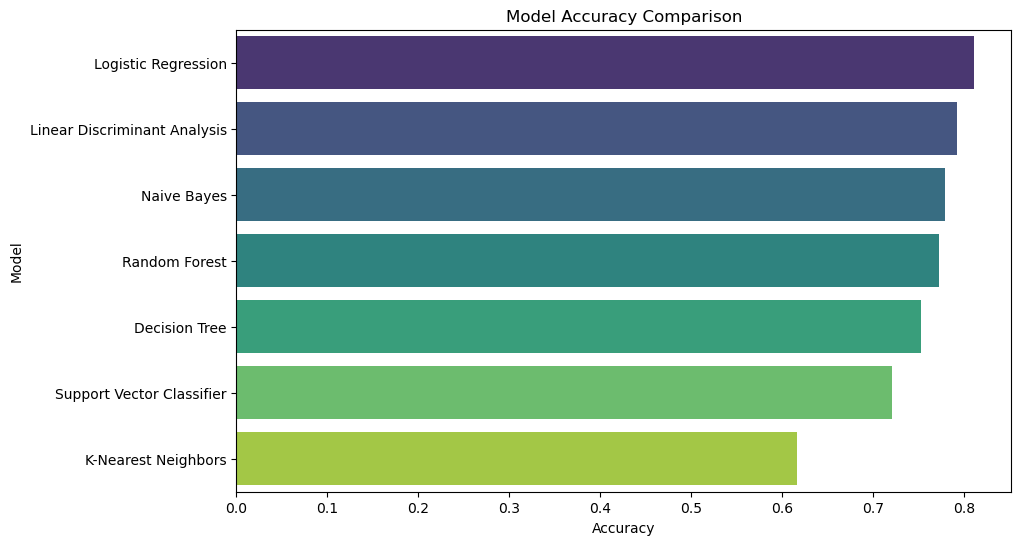

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Instantiate and train each model
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Fit each model and predict
accuracies = {}
for name, model in models.items():
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    accuracy = accuracy_score(test_y, pred)
    accuracies[name] = accuracy

# Create a DataFrame for comparison
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Plot the accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()
